In [12]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# set theme
sns.set_theme(
    context="paper",
    style="whitegrid",
    rc={
        "figure.figsize": (7.0, 3.5),
        "savefig.dpi": 300,
        "figure.autolayout": True,
    },
)


fig_path = Path("../figures")

models = {
    # "al98mmy0": "Optimal Linear Assignment Reward RL Policy",
    # "j0hapm37": "Original (Imitation Learned) Policy",
    "c": "Centralized",
    "d0": "Decentralized (0-Hop)",
    "d1": "Decentralized (1-Hop)",
}

# Load Data

In [13]:
dfs = []
for model_name in models.keys():
    path = fig_path / "test_results" / model_name
    if not path.is_dir():
        continue

    data = pd.read_parquet(path / "data.parquet")
    dfs.append(data.assign(policy=models[path.name]))
df = pd.concat(dfs)
df.head()

,trial,step,reward,coverage,collisions,near_collisions,policy
0,0,0,0.208480,0.16,0,0,Centralized
1,0,1,0.207508,0.21,0,0,Centralized
2,0,2,0.206435,0.22,0,0,Centralized
3,0,3,0.206771,0.22,0,0,Centralized
4,0,4,-0.089995,0.31,0,1,Centralized


# Plot

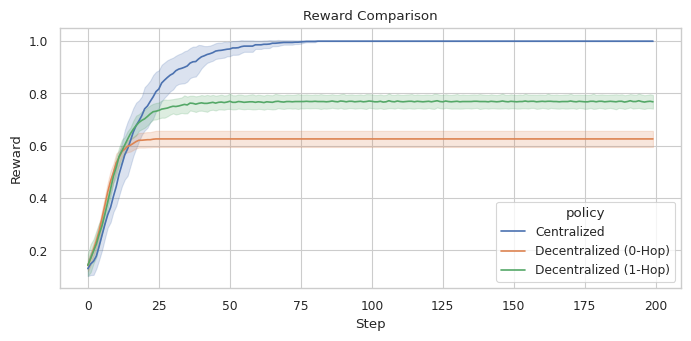

In [14]:
# Create the line plot
sns.lineplot(
    data=df,
    x="step",
    y="coverage",
    hue="policy",
    errorbar="sd",
)
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Reward Comparison")

# Save the plot
plt.savefig(fig_path / "reward_comparison.png")
plt.savefig(fig_path / "reward_comparison.pdf")
plt.show()

In [18]:
# count the number of collisions
# divide by numer of agents
df.groupby(["policy", "trial"])[["collisions", "near_collisions"]].sum().groupby(
    "policy"
).mean()

,collisions,near_collisions
policy,,
Centralized,1.2,87.1
Decentralized (0-Hop),9020.7,9544.3
Decentralized (1-Hop),27.4,368.2
